In [1]:
import pandas as pd
import numpy as np

# Godkänt small_iris.csv

In [2]:
df = pd.read_csv('small_iris.csv')

# Analysera datan

In [3]:
df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [4]:
df.describe()

,sepal length (cm),petal length (cm)
count,150.000000,150.000000
mean,5.843333,3.758000
std,0.828066,1.765298
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


# Innehåller datan konstiga värden?

In [5]:
print("Null värden")
print(df.isnull().sum())

Null värden
sepal length (cm)    0
petal length (cm)    0
dtype: int64


In [6]:
from scipy import stats

z_scores = stats.zscore(df)
outliers = df[(np.abs(z_scores) > 3).all(axis=1)]
print("Outliers")
print(outliers)

Outliers
Empty DataFrame
Columns: [sepal length (cm), petal length (cm)]
Index: []


Datan ser bra ut så jag anser att jag kan använda den utan att göra några ändringar.

# Träna din K-Means (experimentera med K)

In [7]:
import numpy as np

class KMeans:
    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        indices = np.random.permutation(X.shape[0])
        self.centroids = X[indices[:self.K]]

    def compute_centroids(self, X, labels):
        for i in range(self.K):
            self.centroids[i] = X[labels == i].mean(axis=0)

    def compute_distance(self, X):
        return np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids]).T

    def find_closest_centroids(self, distances):
        return np.argmin(distances, axis=1)

    def fit(self, X):
        self.initialize_centroids(X)
        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            distances = self.compute_distance(X)
            self.labels = self.find_closest_centroids(distances)
            self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break

    def predict(self, X):
        distances = self.compute_distance(X)
        return self.find_closest_centroids(distances)


Silhouette Score:  0.7097529827226534


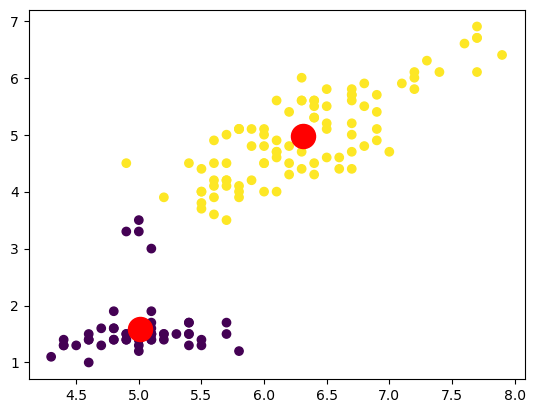

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

kmeans = KMeans(K=2)
kmeans.fit(df.values)
labels = kmeans.predict(df)

score = silhouette_score(df, labels)
print('Silhouette Score: ', score)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
plt.show()


# VG iris.csv

# Analysera datan

In [10]:
df_iris = pd.read_csv('iris.csv')

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Innehåller datan konstiga värden?

In [34]:
print("Null värden")
print(df_iris.isnull().sum())

Null värden
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [41]:
z_scores = stats.zscore(df_iris)
# De absoluta z-poängen större än 3 anses vara utliggare
outliers = df_iris[(np.abs(z_scores) > 3).all(axis=1)]
print("Outliers")
print(outliers)

Outliers
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


# Träna din K-Means (experimentera med K) 
# Rita ut klustrena

Silhouette Score:  0.6869258005156983


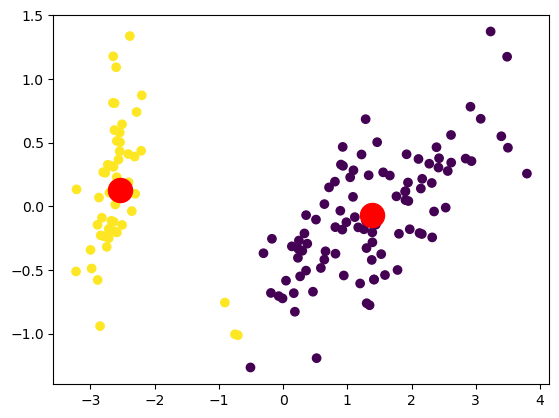

In [55]:
pca = PCA(n_components=3) 
transformed_data = pca.fit_transform(df_iris)
kmeans = KMeans(K=2)
kmeans.fit(transformed_data)
labels = kmeans.predict(transformed_data)
score = silhouette_score(transformed_data, labels)
print('Silhouette Score: ', score)


plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
plt.show()

# VG Mall_Customers.csv  

In [16]:
df_mall = pd.read_csv('Mall_Customers.csv')

In [17]:
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
df_mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Jag väljer att ersätta värdena i kolumnen Gender med dummies.

In [19]:
df_mall = pd.get_dummies(df_mall, columns=['Gender'])


In [20]:
df_mall.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


# Innehåller datan konstiga värden?

In [81]:
print("Null värden")
print(df_mall.isnull().sum())

Null värden
CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Female             0
Gender_Male               0
dtype: int64


In [82]:
df_to_analyze = df_mall[df_mall.columns.difference(['Gender_Female', 'Gender_Male'])]
z_scores = stats.zscore(df_to_analyze)
outliers = df_to_analyze[(np.abs(z_scores) > 3).all(axis=1)]
print("Outliers")
print(outliers)

Outliers
Empty DataFrame
Columns: [Age, Annual Income (k$), CustomerID, Spending Score (1-100)]
Index: []


Jag väljer att normalisera datan då de förekommer kolumner med olika skalor

In [66]:
from sklearn.preprocessing import StandardScaler
df_normalized = df_mall.copy()
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_mall), columns = df_mall.columns)

# Träna din K-Means (experimentera med K) 
# Rita ut klustrena

Silhouette Score:  0.5145003528321598


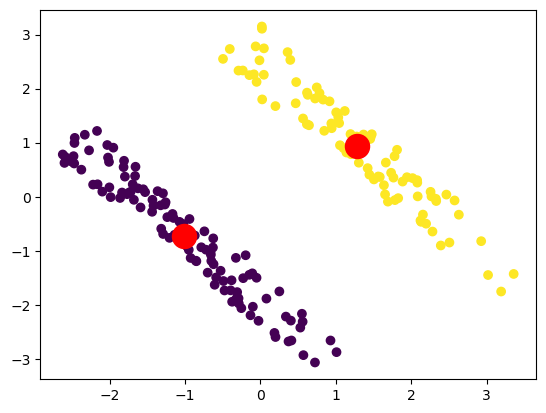

In [80]:
pca = PCA(n_components=2) 
transformed_data = pca.fit_transform(df_normalized)

kmeans = KMeans(K=2)
kmeans.fit(transformed_data)
labels = kmeans.predict(transformed_data)
score = silhouette_score(transformed_data, labels)
print('Silhouette Score: ', score)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
plt.show()